In [1]:
# ----------------------------------------
# stpe 1 : Import Required Libraries
# ----------------------------------------
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Set visualization style 
sns.set(style="whitegrid")

In [2]:
# ----------------------------------------
# Step 2: Load and Explore the Dataset
# ----------------------------------------
df = pd.read_csv("Churn_Modelling.csv")

# Display first and last few rows
print(df.head())
print(df.tail())

# Basic dataset information
print(df.info())

# Show all column names
print("Columns in dataset:\n", df.columns)

# ----------------------------------------
# Step 3: Data Preprocessing
# ----------------------------------------
 
# Drop non-informative columns
X = df.drop(["CustomerId", "Exited"], axis=1)
y = df["Exited"]
X = pd.get_dummies(X)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model Accuracy: 0.85


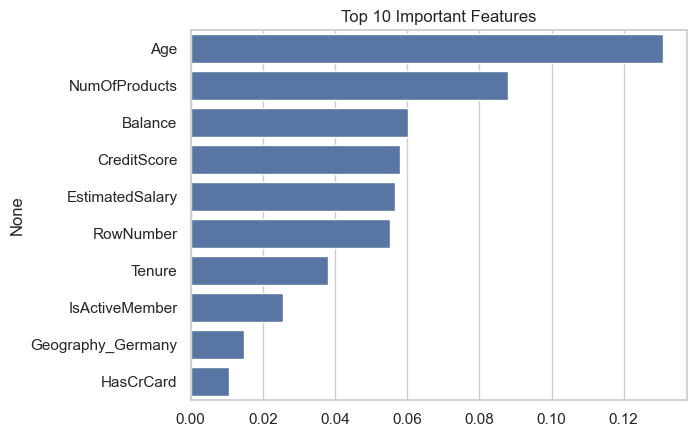

In [7]:
# ----------------------------------------
# Step 5: Feature Importance Visualization (Corrected)
# ----------------------------------------
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features")
plt.show()

import matplotlib.pyplot as plt

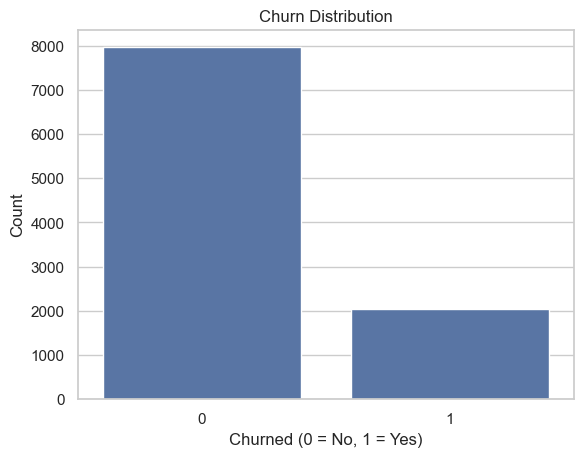

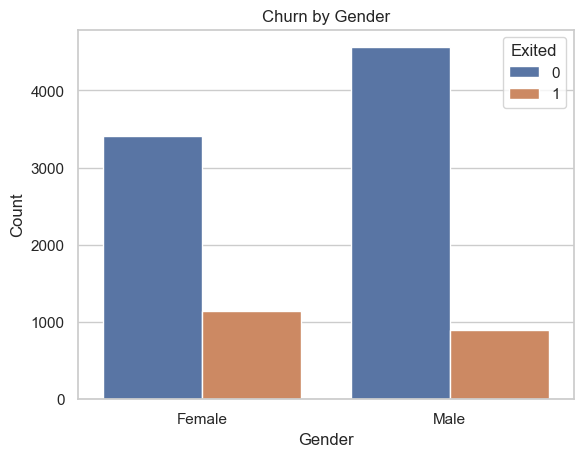

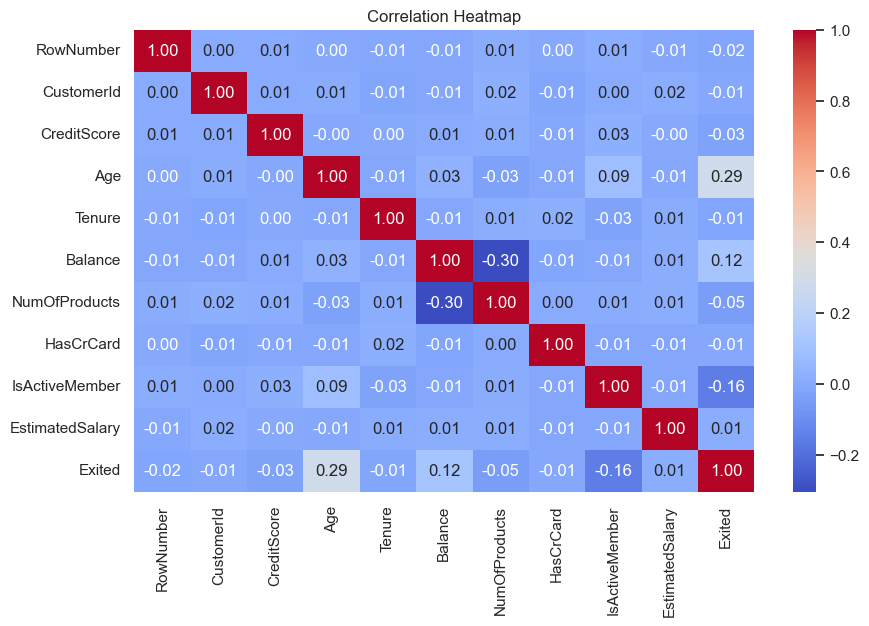

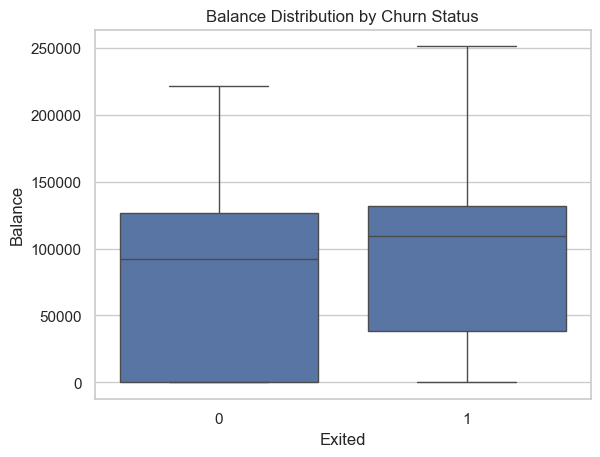

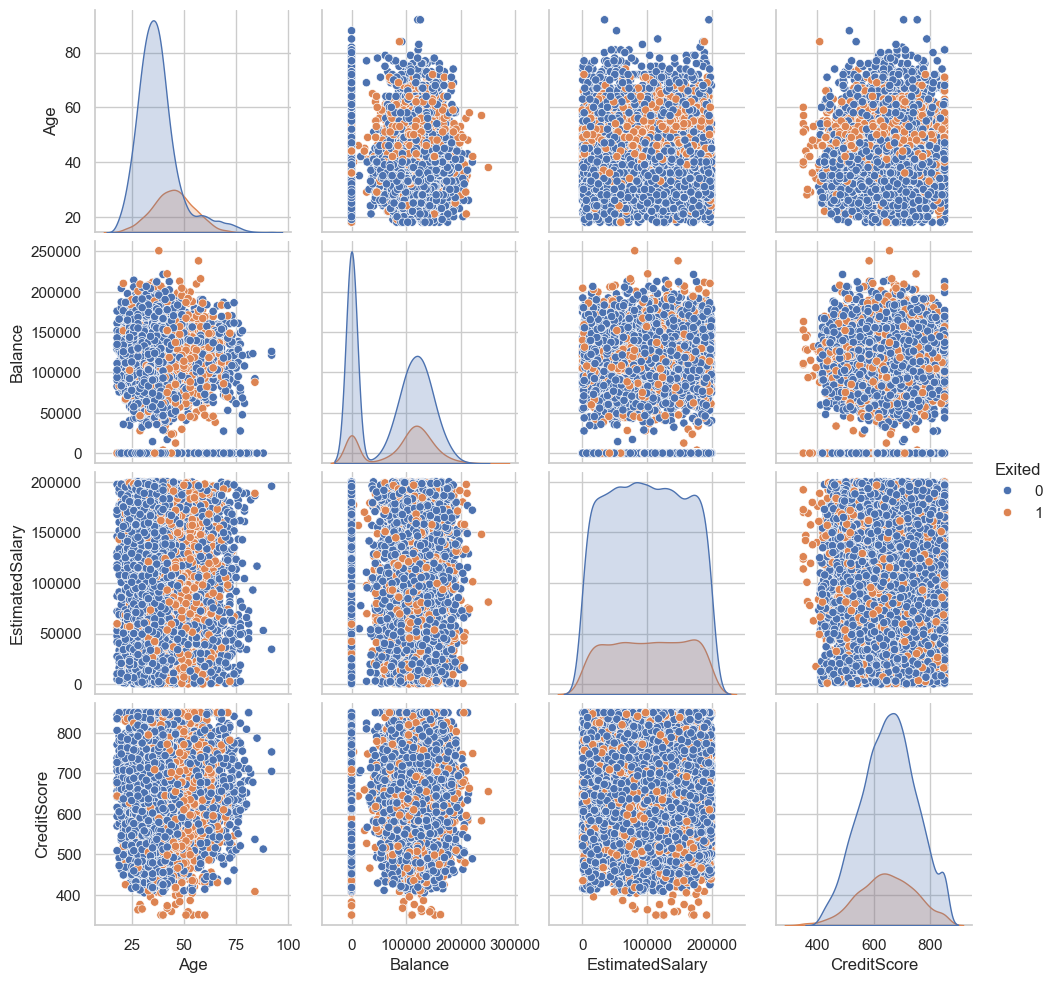

In [9]:
# ----------------------------------------
# Step 6: Data Visualizations for Insights
# ----------------------------------------

# Churn Distribution
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Churn by Gender
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Balance vs Churn - Boxplot
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title("Balance Distribution by Churn Status")
plt.xlabel("Exited")
plt.ylabel("Balance")
plt.show()

# Pairplot for Key Numeric Features
selected_cols = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']
sns.pairplot(df[selected_cols], hue='Exited')
plt.show()

In [10]:
# ----------------------------------------
# Step 7: Classification Report
# ----------------------------------------

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.33      0.47       393

    accuracy                           0.85      2000
   macro avg       0.84      0.66      0.69      2000
weighted avg       0.85      0.85      0.83      2000

